# Equirectangular Transforms with EquiForge

This notebook demonstrates how to use the EquiForge package to convert between perspective and equirectangular image formats.

## Installation

Before running this notebook, make sure you have the `equiforge` package installed:

In [1]:
# Install equiforge if needed
# Uncomment and run this cell if you haven't installed equiforge yet

# %pip install equiforge

## Perspective to Equirectangular Conversion

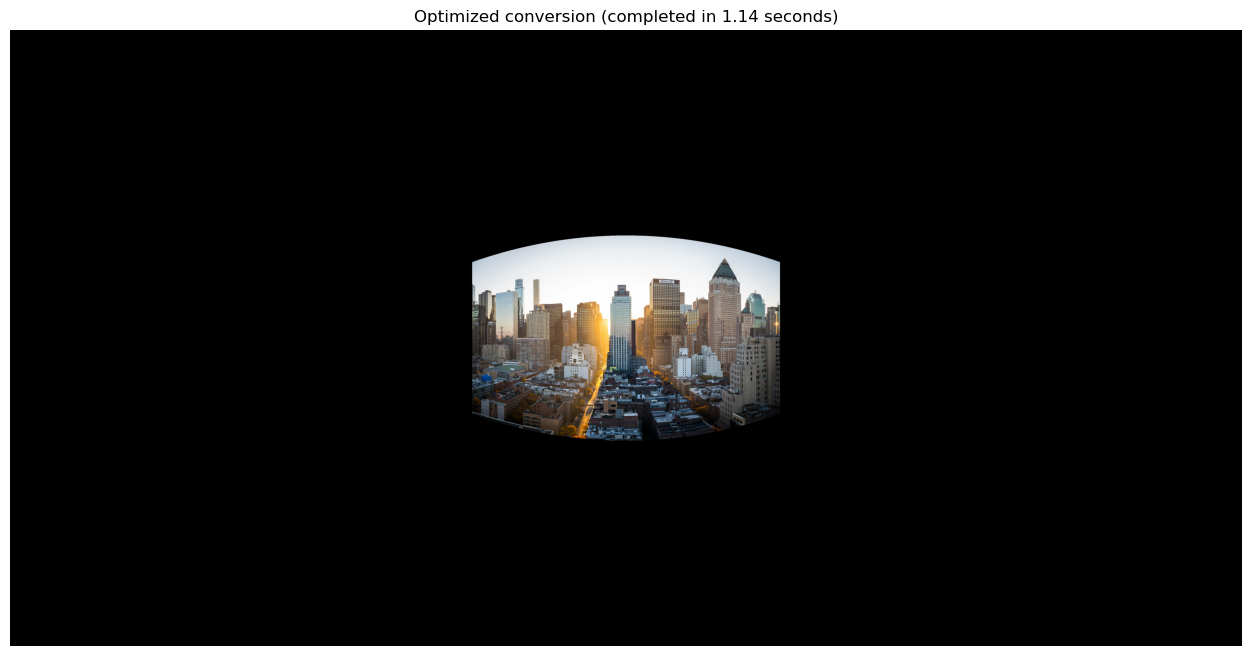

In [2]:
import time
import matplotlib.pyplot as plt

from equiforge import pers2equi

"""
Convert perspective image to equirectangular projection

Parameters:
- img: Input perspective image (numpy array or file path)
- output_height: Height of output equirectangular image (width is automatically calculated to match a 2:1 aspect ratio)
- fov_x: Horizontal field of view in degrees
- yaw: Rotation around vertical axis (left/right) in degrees
- pitch: Rotation around horizontal axis (up/down) in degrees
- roll: Rotation around depth axis (clockwise/counterclockwise) in degrees
- use_gpu: Whether to use GPU acceleration if available
- sampling_method: Sampling method for pixel interpolation ("bilinear" or "nearest")
- log_level: Optional override for log level during this conversion

Returns:
- Equirectangular image as numpy array
"""

pers_in = "Images/pers_1.jpg"  # Or load your own: np.array(Image.open('path/to/equirect.jpg'))

start_time = time.time()

# Convert the perspective image to equirectangular format
equi_out = pers2equi(
    pers_in,
    output_height=4096,         # default: 512
    fov_x=90.0,                 # default: 90.0
    yaw=0.0,                    # default: 0.0
    pitch=0.0,                  # default: 0.0
    roll=0.0,                   # default: 0.0
    use_gpu=True,               # default: True
    sampling_method="bilinear", # default: "bilinear"
    log_level="SILENT"          # default: "SILENT"
)

end_time = time.time()

# Display the result
plt.figure(figsize=(16, 8))
plt.imshow(equi_out)
plt.title(f"Optimized conversion (completed in {end_time - start_time:.2f} seconds)")
plt.axis('off')
plt.show()

## Equirectangular to Perspective Conversion

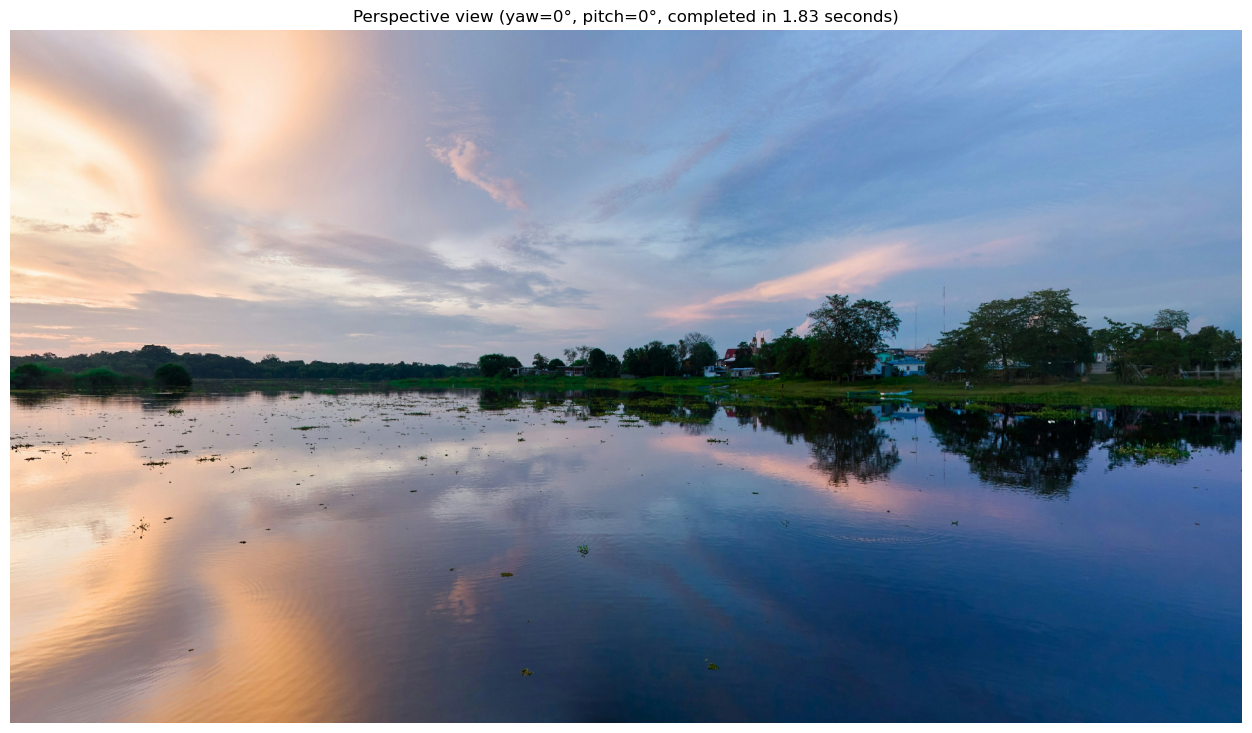

In [3]:
import time
import matplotlib.pyplot as plt

from equiforge import equi2pers

"""
Convert equirectangular image to perspective projection

Parameters:
- img: Input equirectangular image (numpy array or file path)
- output_width: Width of output perspective image
- output_height: Height of output perspective image
- fov_x: Horizontal field of view in degrees
- yaw: Rotation around vertical axis (left/right) in degrees
- pitch: Rotation around horizontal axis (up/down) in degrees
- roll: Rotation around depth axis (clockwise/counterclockwise) in degrees
- use_gpu: Whether to use GPU acceleration if available
- sampling_method: Sampling method for pixel interpolation ("bilinear" or "nearest")
- log_level: Optional override for log level during this conversion

Returns:
- Perspective image as numpy array
"""

equi_in = "Images/equi_3.jpg"  # Or load your own: np.array(Image.open('path/to/equirect.jpg'))

start_time = time.time()

# Convert back to perspective from desired viewing direction
pers_out = equi2pers(
    equi_in,
    output_width=1920,          # no default (required)
    output_height=1080,         # no default (required)
    fov_x=90.0,                 # default: 90.0
    yaw=0.0,                    # default: 0.0
    pitch=0.0,                  # default: 0.0
    roll=0.0,                   # default: 0.0
    use_gpu=True,               # default: True
    sampling_method="bilinear", # default: "bilinear"
    log_level="SILENT"          # default: "SILENT"
)

end_time = time.time()

# Display the result
plt.figure(figsize=(16, 9))
plt.imshow(pers_out)
plt.title(f"Perspective view (yaw=0°, pitch=0°, completed in {end_time - start_time:.2f} seconds)")
plt.axis('off')
plt.show()